# Enoncé du problème

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star= \frac{1}{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

# Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

4. En déduire un algorithme de simulation conditionnelle.

1. C'est la loi forte des grands nombres qui assure que $$\lim\limits_{K \to \infty}\frac{1}{K}\sum_{k=1}^K l_{(k)}=L^*$$

On peut l'appliquer ici car les variables aléatoires $l_{(k)}$ sont indépendantes, de même loi et de carré intégrable car ce sont des sommes finies de variables aléatoires prenant des valeurs finies.

2. Notons X (resp. Y) le sous-vecteur aléatoire de Z correspondant aux points de discrétisation avec (resp. sans) observation.

Alors d'après le cours, on a directement que $\forall x \in \mathbb{R}^n$ la variable aléatoire $Y|X=z$ est gaussienne d'espérance $m_{Y|X=z} = \psi(z) = m_Y + C_{Y,X}C_X^{-1}(z-m_X)$ et de matrice de covariance $CS_Y = C_Y - C_{Y,X}C_X^{-1}C_{X,Y}$. Autrement dit, l'espérance conditionnelle de $Y$ sachant $X$ est la variable aléatoire $Esp(Y|X) = \psi(X) =(m_Y + C_{Y,X}C_X^{-1}(X-m_X))$ avec $C_Y = cov(Y,Y)$, $C_X = cov(X,X)$ et $C_{Y,X} = cov(Y,X)$

3. Si $\mathbf{Z}=m+R\mathbf{Y}$ alors $\mathbf{Z}$ est gaussien comme
combinaison linéaire de variables aléatoires gaussiennes,
$(\mathbb{E}(Z) = \mathbb{E}(m + R\mathbf{Y}) = m)$ et$
(\mathbb{V}(Z) = \mathbb{E}((L\,\mathbf{Y})^2) = R I_d R^t =RR^t ).$

Donc $\mathbf{Z}$ est gaussien de vecteur d'espérance $m$ et de matrice de covariance $RR^t=C$

4. L'algorithme de simulation conditionnelle que nous allons alors mettre en oeuvre est le suivant:
-On calcule la matrice de Covariance Σ

-On simule le vecteur Y de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1 grâce à la méthode  de Box-Muller

-On calcule la factorisation de Cholesky de Σ (possible car Σ est définie-positive par hypothèse et symétrique par construction), on appelle R la matrice triangulaire inférieure ainsie obtenue.

-On peut alors simuler le vecteur aléatoire $\mathbf{Z}=(z(x_0),\dots,z(x_N))$ puisque $\mathbf{z}=\begin{pmatrix}𝜇 \\ \vdots\\𝜇 \end{pmatrix} + RY $

-On utilise finalement la formule de la question 2 pour réaliser les simulations conditionnelles.

# Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


# Implémentation

## Préambule

In [1]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


## Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [2]:
def covariance(d,a,sigma_carré):
    return sigma_carré*np.exp(-abs(d)/a)

2. Calculer la matrice de distance.

In [3]:
distance = np.zeros((N,N))    
for i in range(N):
    for j in range(N):
        distance[i][j] = Delta*abs(i-j)

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [4]:
cov = covariance(distance,a,sigma2)

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [5]:
cache_observable = np.array([i in observation_indexes for i in range(N)])
cache_inconnues = np.array([i in unknown_indexes for i in range(N)])

covariance_observables = cov[cache_observable,:][:,cache_observable]
covariance_observables_inconnues = cov[cache_observable,:][:,cache_inconnues]
covariance_inconnues_observables = cov[cache_inconnues,:][:,cache_observable]
covariance_inconnues = cov[cache_inconnues,:][:,cache_inconnues]

5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

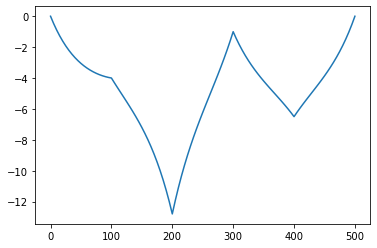

In [6]:
m = np.array([mu for i in range(N)])
mobs = m[observation_indexes]
minc = m[unknown_indexes]

esperance = minc + np.dot(covariance_inconnues_observables,np.dot(np.linalg.inv(covariance_observables),depth-mobs))

#On cherche à remettre les points connus au milieu des points estimés
#Pour cela on décide de mettre tous les points dans la même liste d'abord ceux connus puis ceux inconnus
#Puis on crée une liste permutation qui permet de remettre les points dans l'ordre
#L'intérêt est que la création de la liste est en O(N^2) mais tous les appels à la fonction seront en O(N)

ordre = observation_indexes + unknown_indexes
permutation = np.array([ordre.index(i) for i in range(N)])

def insertion_points(depth,inconnus):
    hauteurs = np.concatenate((depth,inconnus))
    return hauteurs[permutation]

cable_esp = insertion_points(depth,esperance)
abscisses = 5*np.arange(0,N)

plt.plot(abscisses,cable_esp)
plt.show()

6. Calculer la matrice de variance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

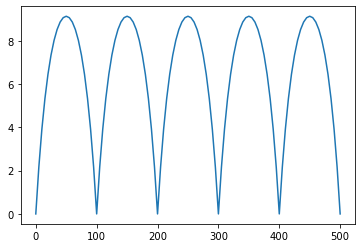

In [7]:
covariance_conditionnelle = covariance_inconnues - np.dot(covariance_inconnues_observables,np.dot(np.linalg.inv(covariance_observables),covariance_observables_inconnues))
variance_conditionnelle = np.diag(covariance_conditionnelle)
variance_connues = [0 for i in depth]
variance = insertion_points(variance_connues,variance_conditionnelle)

plt.plot(abscisses,variance)
plt.show()

Plus on s'éloigne des points connus, plus la variance augmente. Cela correspond au fait qu'on ait plus d'incertitude.

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

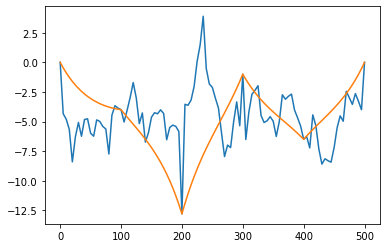

In [15]:
#On implémente l'algorithme décrit à la question 4

#On calcule la décomposition de Choleski de la covariance pour appliquer la formule de la question 3
R = np.linalg.cholesky(covariance_conditionnelle)

def simulation():
    sim_uniforme1 = np.array(np.random.random(len(unknown_indexes)))
    sim_uniforme2 = np.array(np.random.random(len(unknown_indexes)))
    sim_gaussienne_centrée_réduite = np.sqrt(-2*np.log(sim_uniforme1)) * np.cos(2*np.pi*sim_uniforme2)
    sim_inconnues = mu + np.dot(R,sim_gaussienne_centrée_réduite)
    return insertion_points(depth,sim_inconnues)

sim = simulation()

plt.plot(abscisses,sim)
plt.plot(abscisses,cable_esp)
plt.show()

Les variations des simulations sont beaucoup plus violentes, cela crée de la longueur de cable en plus.

8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [16]:
def longueur(profondeurs,pas):
    return np.sum(np.sqrt((profondeurs[1:]-profondeurs[:-1])**2+pas**2))

9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

In [23]:
nb_simulations = 100

longueurs_sim = np.array([longueur(simulation(),Delta) for i in range(nb_simulations)])

print(f"Espérance conditionnelle de la longueur : {np.mean(longueurs_sim)}")
print(f"Longueur de l'espérance conditionnelle : {longueur(cable_esp,Delta)}")

Espérance conditionnelle de la longueur : 536.4011080981746
Longueur de l'espérance conditionnelle : 501.6468416918411


L'espérance conditionnelle de la longueur est largement supérieure à la longueur de l'espérance conditionnelle. Cela semble normal puisque sur les simulations le cable a tendance à avoir des variations plus violentes que l'espérance conditionnelle de la longueur

10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

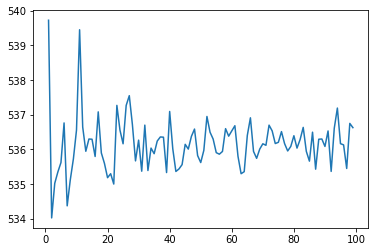

In [24]:
M = np.array([np.mean([longueur(simulation(),Delta) for i in range(j)]) for j in range(1,nb_simulations)])

plt.plot(np.arange(1,nb_simulations),M)
plt.show()

La suite semble converger autour de 536 m

11. Représenter l'histogramme des longueurs de câbles générées.

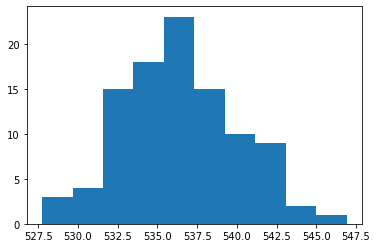

In [25]:
plt.hist(longueurs_sim)
plt.show()

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

In [26]:
#Méthode 1: 
#On sort les 2,5% des plus petites et des plus grandes valeurs pour estimer que 95% des valeurs sont dans l'intervalle
longueurs_sim.sort()
print(f"Intervalle de confiance 1 : [{longueurs_sim[int(0.025*nb_simulations)]},{longueurs_sim[int(0.975*nb_simulations)]}]")

#Méthode 2:
#On calcule l'intervalle avec la formule vue en Terminale : [moyenne -/+ 1.96*ecart_type/sqrt(nombre de simulation)]

moyenne = np.mean(longueurs_sim)
ecart_type  = np.sqrt(1/nb_simulations*np.sum((longueurs_sim - moyenne)**2))
print(f"Intervalle de confiance 2 : [{moyenne - 1.96*ecart_type/np.sqrt(nb_simulations)},{moyenne + 1.96*ecart_type/np.sqrt(nb_simulations)}]")

Intervalle de confiance 1 : [529.5966824229241,543.2260850628439]
Intervalle de confiance 2 : [535.6795948815142,537.1226213148349]


L'intervalle de confiance "à la main" est beaucoup plus large que celui calculé mathématiquement.
En effet, la formule mathématique présuppose l'unicité de la vraie probabilité et qu'elle est dans un intervalle tandis qu'en réalité la longueur n'est pas une unique longueur que l'on cherche à trouver.

13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

In [27]:
print(np.sum(longueurs_sim>525)/nb_simulations)

1.0


14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter.

Espérance conditionnelle de la longueur : 536.1760379604106
Longueur de l'espérance conditionnelle : 501.6468416918411
Intervalle de confiance 1 : [528.840762052262,543.7631440808793]
Intervalle de confiance 2 : [535.9396497261565,536.4124261946646]
1.0


c:\users\adrien\miniconda\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


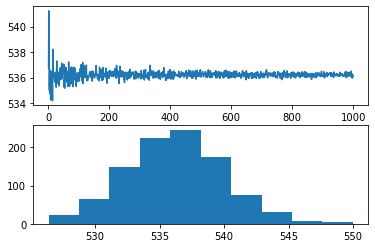

In [28]:
nb_simulations = 1000

longueurs_sim = np.array([longueur(simulation(),Delta) for i in range(nb_simulations)])

print(f"Espérance conditionnelle de la longueur : {np.mean(longueurs_sim)}")
print(f"Longueur de l'espérance conditionnelle : {longueur(cable_esp,Delta)}")

M = np.array([np.mean([longueur(simulation(),Delta) for i in range(j)]) for j in range(1,nb_simulations)])

#Méthode 1: 
#On sort les 2,5% des plus petites et des plus grandes valeurs pour estimer que 95% des valeurs sont dans l'intervalle
longueurs_sim.sort()
print(f"Intervalle de confiance 1 : [{longueurs_sim[int(0.025*nb_simulations)]},{longueurs_sim[int(0.975*nb_simulations)]}]")

#Méthode 2:
#On calcule l'intervalle avec la formule vue en Terminale : [moyenne -/+ 1.96*ecart_type/sqrt(nombre de simulation)]

moyenne = np.mean(longueurs_sim)
ecart_type  = np.sqrt(1/nb_simulations*np.sum((longueurs_sim - moyenne)**2))
print(f"Intervalle de confiance 2 : [{moyenne - 1.96*ecart_type/np.sqrt(nb_simulations)},{moyenne + 1.96*ecart_type/np.sqrt(nb_simulations)}]")

print(np.sum(longueurs_sim>525)/nb_simulations)

fig,axes = plt.subplots(2)

axes[0].plot(np.arange(1,nb_simulations),M)
axes[1].hist(longueurs_sim)
fig.show()

In [ ]:
nb_simulations = 10000

longueurs_sim = np.array([longueur(simulation(),Delta) for i in range(nb_simulations)])

print(f"Espérance conditionnelle de la longueur : {np.mean(longueurs_sim)}")
print(f"Longueur de l'espérance conditionnelle : {longueur(cable_esp,Delta)}")

M = np.array([np.mean([longueur(simulation(),Delta) for i in range(j)]) for j in range(1,nb_simulations)])

#Méthode 1: 
#On sort les 2,5% des plus petites et des plus grandes valeurs pour estimer que 95% des valeurs sont dans l'intervalle
longueurs_sim.sort()
print(f"Intervalle de confiance 1 : [{longueurs_sim[int(0.025*nb_simulations)]},{longueurs_sim[int(0.975*nb_simulations)]}]")

#Méthode 2:
#On calcule l'intervalle avec la formule vue en Terminale : [moyenne -/+ 1.96*ecart_type/sqrt(nombre de simulation)]

moyenne = np.mean(longueurs_sim)
ecart_type  = np.sqrt(1/nb_simulations*np.sum((longueurs_sim - moyenne)**2))
print(f"Intervalle de confiance 2 : [{moyenne - 1.96*ecart_type/np.sqrt(nb_simulations)},{moyenne + 1.96*ecart_type/np.sqrt(nb_simulations)}]")

print(np.sum(longueurs_sim>525)/nb_simulations)

fig,axes = plt.subplots(2)

axes[0].plot(np.arange(1,nb_simulations),M)
axes[1].hist(longueurs_sim)
fig.show()

Espérance conditionnelle de la longueur : 536.2290448128307
Longueur de l'espérance conditionnelle : 501.6468416918411


In [ ]:
nb_simulations = 100000

longueurs_sim = np.array([longueur(simulation(),Delta) for i in range(nb_simulations)])

print(f"Espérance conditionnelle de la longueur : {np.mean(longueurs_sim)}")
print(f"Longueur de l'espérance conditionnelle : {longueur(cable_esp,Delta)}")

M = np.array([np.mean([longueur(simulation(),Delta) for i in range(j)]) for j in range(1,nb_simulations)])

#Méthode 1: 
#On sort les 2,5% des plus petites et des plus grandes valeurs pour estimer que 95% des valeurs sont dans l'intervalle
longueurs_sim.sort()
print(f"Intervalle de confiance 1 : [{longueurs_sim[int(0.025*nb_simulations)]},{longueurs_sim[int(0.975*nb_simulations)]}]")

#Méthode 2:
#On calcule l'intervalle avec la formule vue en Terminale : [moyenne -/+ 1.96*ecart_type/sqrt(nombre de simulation)]

moyenne = np.mean(longueurs_sim)
ecart_type  = np.sqrt(1/nb_simulations*np.sum((longueurs_sim - moyenne)**2))
print(f"Intervalle de confiance 2 : [{moyenne - 1.96*ecart_type/np.sqrt(nb_simulations)},{moyenne + 1.96*ecart_type/np.sqrt(nb_simulations)}]")

print(np.sum(longueurs_sim>525)/nb_simulations)

fig,axes = plt.subplots(2)

axes[0].plot(np.arange(1,nb_simulations),M)
axes[1].hist(longueurs_sim)
fig.show()

L'intervalle de confiance s'affine autour de l'espérance lorsqu'on augmente le nombre de simulations